In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from string import punctuation 
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\haman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
# Load Dataset
data = 'https://raw.githubusercontent.com/hamant-jagwan/Machine_Learning_UPES_2nd_sem/refs/heads/main/Dataset/sentiment_analysis.csv'

df = pd.read_csv(data, encoding= 'ISO-8859-1')

In [28]:
df.head(5)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [30]:
# Removing unnecessary characters

def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df['clean_text'] = df['text'].apply(remove_unnecessary_characters)

In [31]:
# Tokenization

def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df['tokens'] = df['text'].apply(tokenize_text)

In [32]:
# Data Normalization

def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
df['normalized_text'] = df['text'].apply(normalize_text)

In [33]:
# Removing Stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()        
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

In [34]:
# Removing Missing values
df.dropna(inplace=True)

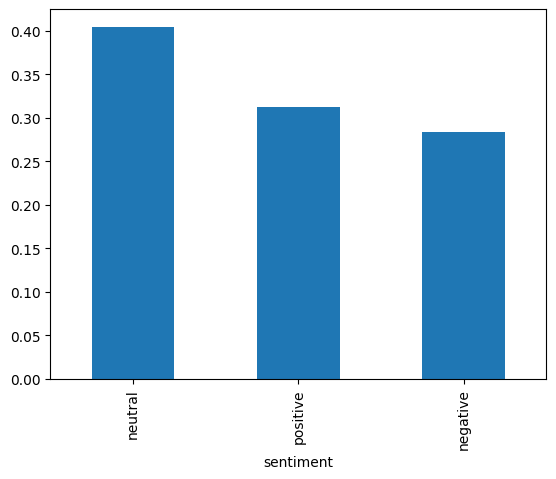

In [35]:
# Sentiment valuecounts

df['sentiment'].value_counts(normalize=True).plot(kind='bar');

In [36]:
df['sentiment'].value_counts()

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64

I'll convert the'sentiment' column in the DataFrame 'df' to categorical data and then encode it as numerical codes. Then I'll calculate the distribution of these emotion codes and plot it in a bar graph



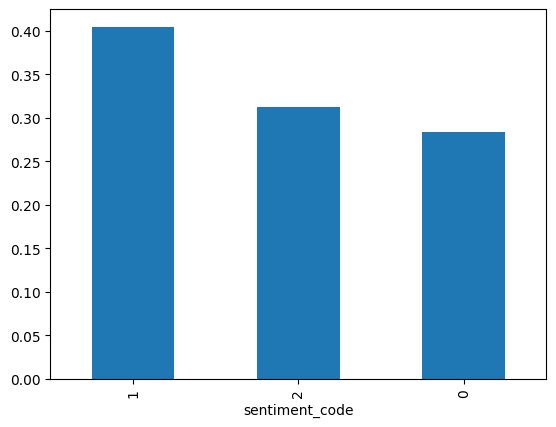

In [37]:
# Categorization

df['sentiment_code'] = df['sentiment'].astype('category').cat.codes
sentiment_distribution = df['sentiment_code'].value_counts(normalize=True)
sentiment_distribution.plot(kind='bar')
plt.show()



I removed stopwords and exclamation marks from the data, used a Lancaster stemword to tie words together, and created a text collection from DataFrame. Finally, I'll print the corpus' length and first element

In [39]:
# Stems words Using the Lancaster Stemmer
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])



3534
Last session of the day  http://twitpic.com/67ezh


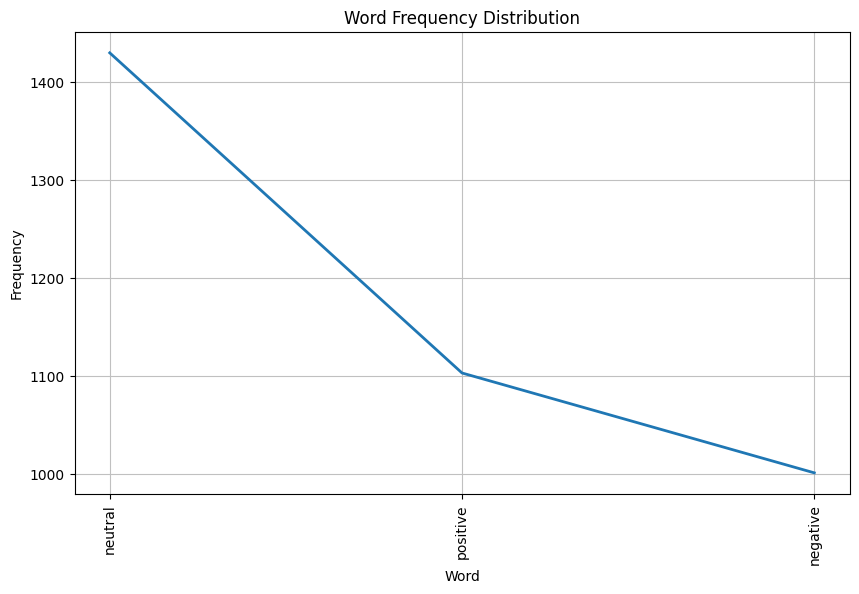

In [40]:
# Word Frequency Distribution
from nltk.probability import FreqDist
word_freq = FreqDist(word_tokenize(' '.join(df['sentiment'])))
plt.figure(figsize=(10, 6))
word_freq.plot(20, cumulative=False)
plt.title('Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

I've created two columns, "text" and "sentiment", in DataFrameData_eda. The "text" column contains the tweet text converted to strings and stored in a list (final_corpus), while the "sentiment" column contains the sentiment values from the original DataFrame (df)



In [41]:
# Convert to strings
final_corpus = df['text'].astype(str).tolist()
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df["sentiment"].values
data_eda.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [42]:
df['Time of Tweet'] = df['Time of Tweet'].astype('category').cat.codes
df['Country'] = df['Country'].astype('category').cat.codes
df['Age of User']=df['Age of User'].replace({'0-20':18,'21-30':25,'31-45':38,'46-60':53,'60-70':65,'70-100':80})


In [43]:
# Removing irrelevent columns
df=df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

I defines a function wp(text) that preprocesses text data by removing URLs, HTML tags, punctuation, newline characters, and alphanumeric words containing digits. I then use this preprocessing function in a DataFrame'selected_text' column named 'DF'

In [45]:
df.columns

Index(['text', 'sentiment', 'clean_text', 'tokens', 'normalized_text',
       'text_without_stopwords', 'sentiment_code'],
      dtype='object')

In [46]:
df.head()

,text,sentiment,clean_text,tokens,normalized_text,text_without_stopwords,sentiment_code
0,Last session of the day http://twitpic.com/67ezh,neutral,Last session of the day httptwitpiccom67ezh,"[Last, session, of, the, day, http, :, //twitp...",last session of the day httptwitpiccom67ezh,Last session day http://twitpic.com/67ezh,1
1,Shanghai is also really exciting (precisely -...,positive,Shanghai is also really exciting precisely sky...,"[Shanghai, is, also, really, exciting, (, prec...",shanghai is also really exciting precisely sky...,Shanghai also really exciting (precisely -- sk...,2
2,"Recession hit Veronique Branquinho, she has to...",negative,Recession hit Veronique Branquinho she has to ...,"[Recession, hit, Veronique, Branquinho, ,, she...",recession hit veronique branquinho she has to ...,"Recession hit Veronique Branquinho, quit compa...",0
3,happy bday!,positive,happy bday,"[happy, bday, !]",happy bday,happy bday!,2
4,http://twitpic.com/4w75p - I like it!!,positive,httptwitpiccom4w75p I like it,"[http, :, //twitpic.com/4w75p, -, I, like, it,...",httptwitpiccom4w75p i like it,http://twitpic.com/4w75p - like it!!,2


In [47]:
# preprocess text
import string
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
df['selected_text'] = df["text"].apply(wp)

### Train test split

In [48]:
# Evaluation of Dataset
X=df['selected_text']
y= df['sentiment']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
# Creating TF - IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)



In [51]:
score_baseline = df['sentiment'].value_counts(normalize=True).max()
score_baseline


np.float64(0.4046406338426712)

#### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train,y_train)

LogisticRegression(n_jobs=-1)

In [53]:
pred_lr=lr.predict(XV_test)

In [54]:
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
score_lr = accuracy_score(y_test, pred_lr)
score_lr

0.6407355021216408

In [55]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

    negative       0.70      0.50      0.58       207
     neutral       0.57      0.74      0.65       286
    positive       0.73      0.64      0.68       214

    accuracy                           0.64       707
   macro avg       0.67      0.63      0.64       707
weighted avg       0.66      0.64      0.64       707



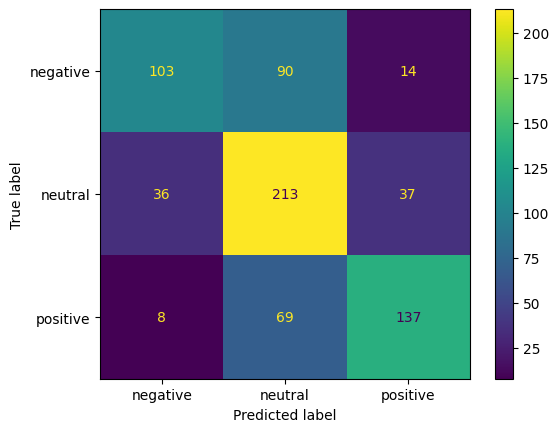

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr);

#### DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(XV_train, y_train)


DecisionTreeClassifier()

In [58]:
pred_dt = dt.predict(XV_test)


In [59]:
score_dt = dt.score(XV_test, y_test)
score_dt

0.5544554455445545

In [60]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

    negative       0.49      0.47      0.48       207
     neutral       0.53      0.58      0.55       286
    positive       0.65      0.61      0.63       214

    accuracy                           0.55       707
   macro avg       0.56      0.55      0.55       707
weighted avg       0.56      0.55      0.55       707



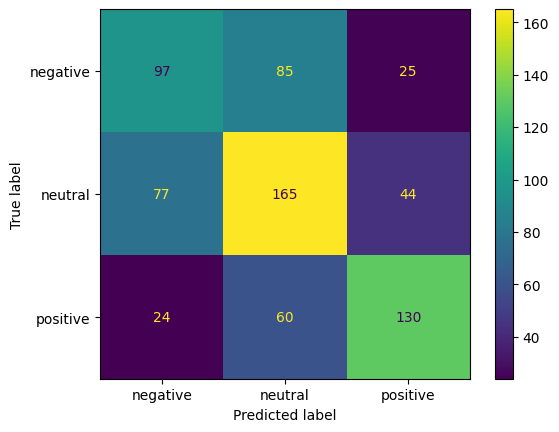

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt);

#### RandomForestClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)

RandomForestClassifier(random_state=0)

In [63]:
pred_rfc = rfc.predict(XV_test)

In [64]:
score_rfc = rfc.score(XV_test, y_test)
score_rfc

0.635077793493635

In [65]:
print(classification_report(y_test, pred_rfc))


              precision    recall  f1-score   support

    negative       0.67      0.47      0.55       207
     neutral       0.56      0.77      0.65       286
    positive       0.77      0.62      0.68       214

    accuracy                           0.64       707
   macro avg       0.67      0.62      0.63       707
weighted avg       0.66      0.64      0.63       707



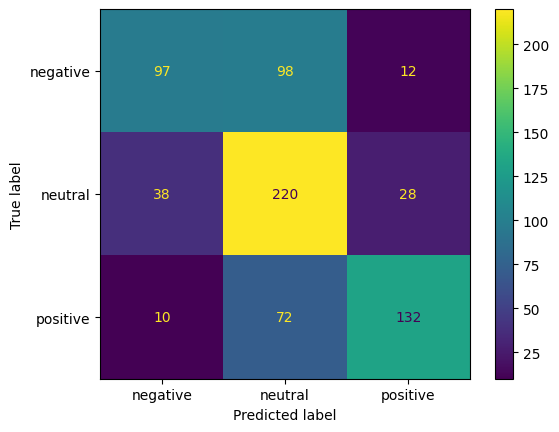

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_rfc);


In [67]:
print(f'Baseline model:{score_baseline} \nLogistic regression {score_lr}\nDecision Tree Classification {score_dt}\nRandim Forest Classifier {score_rfc}')

Baseline model:0.4046406338426712 
Logistic regression 0.6407355021216408
Decision Tree Classification 0.5544554455445545
Randim Forest Classifier 0.635077793493635


I've defined functions to predict the sentiment of a text based on machine learning. Output_label() is used to translate numerical sentiment labels into readable text labels. Manual_testing() uses a trained model to make predictions about the sentiment of that text and prints its result using output_label()

In [68]:
def output_lable(n):
    if n == 0:
        return "The Text Sentement is Negative"
    elif n == 1:
        return "The Text Sentement is Neutral"
    elif n == 2:
        return "The Text Sentement is Positive"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return print((output_lable(pred_lr[1])))


I'm defining a function manual_testing to convert input text to uppercase, create a DataFrame with a single column named "text" containing the processed text, vectorize the text using a vectorization technique assumed to be defined elsewhere in the code, and return a vectorized representation of the text



In [70]:
def wp(text):
    return text.upper()
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    return new_xv_test
text = "I am Sad"
manual_testing(text)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (1, 6130)>

Conclusion 

I have performed several preprocessing steps on the dataset during the process of performing sentiment analysis usingNLP. The dataset is then trained and evaluated on different machine learning models following this preprocessing. For each model, the following accuracy scores have been attained:

Logistic Regression: 64.07%

Decision Tree Classification: 55.44%

Random Forest Classifier: 63.50%

In predicting sentiment based on the processed text, these accuracy scores indicate the performance of the various models. Logistic regression, followed by random forest classification and finally a decision tree classification model achieved the highest accuracy among the models assessed